In [3]:
#Import modules

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

from numpy import arange, log10

from functions import chunk, agg, finalize
tunique = dd.Aggregation('tunique', chunk, agg,finalize)
first = dd.Aggregation('first', chunk, agg,finalize)

## Size of foreign buyers

In [4]:
data_path = './../../data/processed/'
firm_sizes = pd.read_csv(data_path + 'ID_Y.csv')
buyr_sizes = pd.read_csv(data_path + 'VAT_Y.csv')

firm_sizes['log_VART'] = log10(firm_sizes.VART)
buyr_sizes['log_VART'] = log10(buyr_sizes.VART)


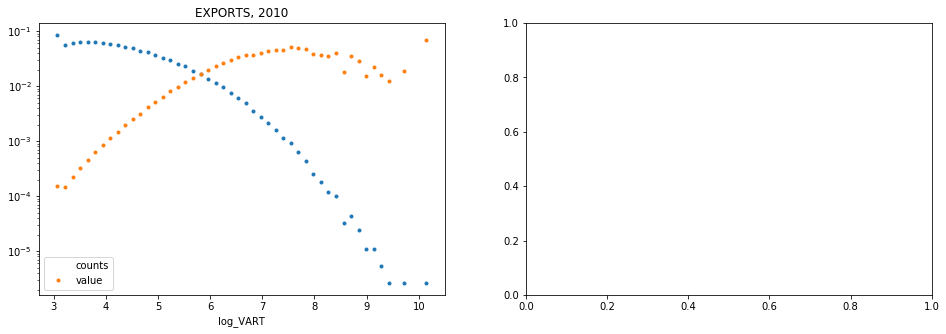

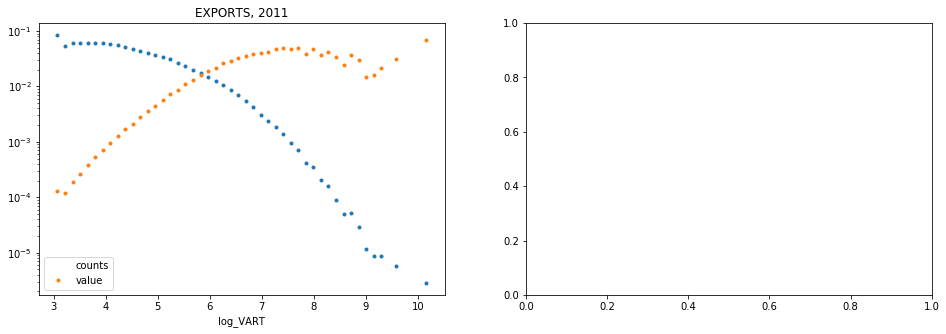

In [5]:
from numpy import inf, nan

fs_df = buyr_sizes
id_col = 'VAT' # 'ID'
bins = 50.

for y in [2010, 2011]:
    fig, axs = plt.subplots(1, 2, figsize = (16, 5))
    for i in [0, 1]:
        try:
            
            fs_df_slice = fs_df.loc[(fs_df.YEAR == y) & (fs_df.IMPORT == i)].replace(-inf, nan).dropna()
            fs_df_slice['bin'], bins_x = pd.cut(fs_df_slice['log_VART'], bins = bins, retbins=True)

            fs_ct_val = fs_df_slice.groupby('bin').agg({id_col: 'count', 'VART': sum}).rename(columns = {id_col: 'counts', 'VART': 'value'})

            fs_ct_val/=fs_ct_val.sum()
            ax = axs[i]
            fs_ct_val['log_VART'] = (bins_x[:-1] + bins_x[1:])/2.
            fs_ct_val.plot(x = 'log_VART', y = 'counts', ax = ax, marker = '.', lw = 0)
            fs_ct_val.plot(x = 'log_VART', y = 'value', ax = ax, marker = '.', lw = 0)
            ax.set_title('IMPORTS, '+str(y)) if i == 1 else ax.set_title('EXPORTS, '+str(y))
#             ax.set_ylim(0, 6/bins)
            ax.set_yscale('log')
        except:
            pass

### Value by buyer, seller size

In [6]:
### Now all data obtained in the Extract from database.

# drive_path = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

# colnames = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'DEPT', u'CN ID 8', u'CPA6',
#        u'PYOD', u'PAYP', u'VAT', u'PRIFAC', u'DEVFAC', u'VFTE', u'VART', u'D_MASSE', u'MASSE', u'USUP', u'USUP_MT']

# colname_no = dict(zip(colnames, range(18)))
# columns = [u'YEAR', u'FLUX', u'ID', u'VAT', u'VART']

# df_list = []

# for y in range(1997, 2014):
#     df_list += [dd.read_table(drive_path+'/DP1610_MAASTRICHT1_'+str(y)+'.txt', 
#             usecols = map(colname_no.get, columns),
#             delimiter = ';', header = None, dtype = {9: 'object'})]

# data = dd.concat(df_list)
# data.columns = columns
# data['IMPORT'] = data['FLUX'] % 2

# links = data.groupby(['IMPORT','YEAR','ID','VAT'])['VART'].sum().reset_index()


In [7]:
# with ProgressBar():
#     out = links.compute()
# out.to_csv('buyer_seller_links.csv', index = False)

[########################################] | 100% Completed | 16min 41.3s


In [4]:
# links = pd.read_csv('./buyer_seller_links.csv')
# links = links.loc[links.VART > 1000]

# links['log_VART'] = log10(links.VART)#.replace(-inf, nan).dropna()
# # links['bin'], bins_x = pd.cut(links['log_VART'], 90, retbins=True)

In [6]:
save_path = './../../data/processed/'
links = pd.read_csv(save_path+'buyer_seller_link_value.csv')
links['log_VART'] = log10(links.VART)#.replace(-inf, nan).dropna()
# Puede no arrancar en 1997, pero OK

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


In [31]:
firm_sizes.loc[(firm_sizes.VART > 10000000) & (firm_sizes.YEAR == 2013)].head()

,ID,IMPORT,YEAR,VART,VFTE,log_VART
3555194,793,0,2013,46558559,46486365,7.668000
3555195,793,1,2013,11798865,11878889,7.071840
3555210,2971,1,2013,10120259,9309725,7.005192
3555217,3110,1,2013,10970616,10961963,7.040231
3555242,4878,0,2013,72831397,72795022,7.862319


In [36]:
links.loc[links.ID == 4878].head()

,IMPORT,YEAR,ID,VAT,VART,log_VART
276,0,2005,4878,AT0046093,1091164,6.037890
277,0,2005,4878,BE0166733,420325,5.623585
278,0,2005,4878,BE0171677,42872,4.632174
279,0,2005,4878,BE0192796,92997,4.968469
280,0,2005,4878,CZ0000232,351641,5.546100


In [7]:
links_y = links.loc[links.YEAR == 2013]

# firm_sizes = pd.read_csv('firm_sizes.csv')
# buyr_sizes = pd.read_csv('buyr_sizes.csv')

firm_sizes_y = firm_sizes.loc[(firm_sizes.YEAR == 2013) & (firm_sizes.IMPORT == 0)].rename(columns = {'log_VART': 'seller_log_VART'})
buyr_sizes_y = buyr_sizes.loc[(buyr_sizes.YEAR == 2013) & (buyr_sizes.IMPORT == 0)].rename(columns = {'log_VART': 'buyer_log_VART'})

In [ ]:
links_val = links_y.merge(firm_sizes_y[['ID','seller_log_VART']], on = 'ID'
                         ).merge(buyr_sizes_y[['VAT', 'buyer_log_VART']], on = 'VAT')
links_val

In [ ]:
from numpy import arange
bins = arange(3, 10, .1)
links_val['y_bin'] = pd.cut(links_val['seller_log_VART'], bins)
links_val['x_bin'] = pd.cut(links_val['buyer_log_VART'], bins)

In [ ]:
result = links_val.groupby(['x_bin','y_bin']).agg({'seller_log_VART': 'mean', 'buyer_log_VART': 'mean', 
                                                   'VART': 'sum', 'YEAR': 'count'})

In [ ]:
links_val.sample(10000).plot(x = 'seller_log_VART', y = 'buyer_log_VART', marker = '.', linewidth = 0, alpha = .2)

In [1]:
import seaborn as sns

g = sns.jointplot("seller_log_VART", "buyer_log_VART", data=result, kind="kde", space=0, color="g")

# ax = sns.kdeplot(result.log_VART_x, setosa.log_VART_y,
#                  cmap="Reds", shade=True, shade_lowest=False)
# ax = sns.kdeplot(result.sepal_width, virginica.sepal_length,
#                  cmap="Blues", shade=True, shade_lowest=False)

NameError: name 'result' is not defined

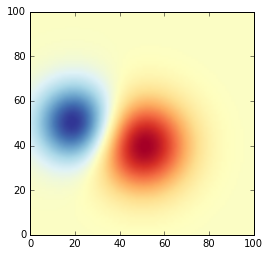

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))


# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights_high = np.array(np.meshgrid(gauss_x_high, gauss_y_high)).prod(0)
weights_low = -1 * np.array(np.meshgrid(gauss_x_low, gauss_y_low)).prod(0)
weights = weights_high + weights_low

# We'll also create a grey background into which the pixels will fade
greys = np.empty(weights.shape + (3,), dtype=np.uint8)
greys.fill(70)

# First we'll plot these blobs using only ``imshow``.
vmax = np.abs(weights).max()
vmin = -vmax
cmap = plt.cm.RdYlBu

fig, ax = plt.subplots()
# ax.imshow(greys)
ax.imshow(weights, extent=(xmin, xmax, ymin, ymax), cmap=cmap)
# ax.set_axis_off()

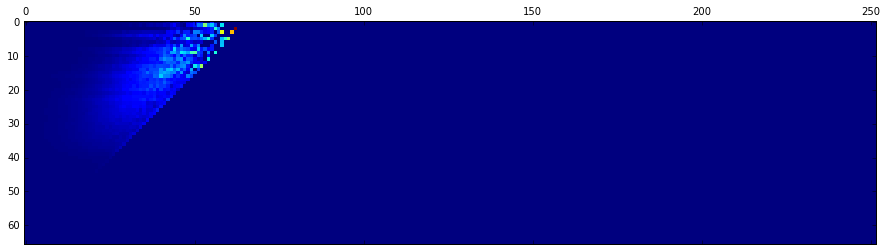

In [92]:
plt.matshow(result.unstack(0).sort_index(ascending = False).fillna(0).values)

In [78]:
result.unstack(0).sort_index(ascending = False)

VART                                               \
x_bin      (3.0, 3.1] (3.1, 3.2] (3.2, 3.3] (3.3, 3.4]  (3.4, 3.5]   
y_bin                                                                
(9.8, 9.9]        NaN        NaN        NaN        NaN         NaN   
(9.7, 9.8]     9196.0    15615.0    28033.0    25551.0     35918.0   
(9.6, 9.7]        NaN        NaN        NaN        NaN      8665.0   
(9.5, 9.6]     1161.0     5242.0     1600.0     2435.0      2800.0   
(9.4, 9.5]     2279.0        NaN     3538.0    14997.0     13609.0   
(9.3, 9.4]     4423.0     4504.0     5266.0     9195.0     13564.0   
(9.2, 9.3]   620067.0   801259.0  1081506.0  1393638.0   1615470.0   
(9.1, 9.2]    45653.0    47504.0    85163.0   149439.0    131467.0   
(9.0, 9.1]     7702.0    12250.0    17930.0    15336.0     48516.0   
(8.9, 9.0]    19304.0    21612.0    33837.0    47883.0     85232.0   
(8.8, 8.9]   160510.0   225142.0   284998.0   371771.0    455608.0   
(8.7, 8.8]   424912.0   565776.0   691091.0   952313.0   1200551.0   
(8.6, 8.7]    95436.0   114535.0   165134.0   203138.0    310437.0   
(8.5, 8.6]   198505.0   224492.0   293047.0   470001.0    596189.0   
(8.4, 8.5]   345661.0   412443.0   609981.0   787420.0    986011.0   
(8.3, 8.4]   275309.0   310524.0   451701.0   698666.0    871329.0   
(8.2, 8.3]   236451.0   353505.0   463071.0   732000.0   1048948.0   
(8.1, 8.2]   611968.0   886474.0  1039002.0  1408002.0   1770985.0   
(8.0, 8.1]   503333.0   766220.0  1022535.0  1526507.0   2209756.0   
(7.9, 8.0]  3312217.0  4107478.0  4702781.0  5482258.0   6253136.0   
(7.8, 7.9]  1437444.0  1801529.0  2259869.0  3167330.0   3941804.0   
(7.7, 7.8]  3508401.0  4400439.0  5432963.0  6617056.0   8292656.0   
(7.6, 7.7]   883898.0  1242337.0  1777209.0  2424767.0   3432741.0   
(7.5, 7.6]  1460611.0  2137117.0  2822140.0  3982289.0   5188584.0   
(7.4, 7.5]  1755252.0  2395590.0  3404941.0  4613348.0   5923754.0   
(7.3, 7.4]  2182327.0  3057676.0  3990244.0  5494858.0   7138919.0   
(7.2, 7.3]  2618467.0  3653665.0  4960671.0  6732909.0   8520882.0   
(7.1, 7.2]  2659419.0  3778628.0  4830220.0  6609441.0   8643122.0   
(7.0, 7.1]  3195674.0  4475047.0  6171052.0  8024170.0  10324209.0   
(6.9, 7.0]  3423133.0  4692932.0  6194009.0  8061917.0   9786537.0   
...               ...        ...        ...        ...         ...   
(5.9, 6.0]  3570535.0  4431601.0  5792062.0  6906305.0   8594607.0   
(5.8, 5.9]  2818304.0  3713070.0  4594194.0  5584311.0   6988787.0   
(5.7, 5.8]  2397610.0  3024932.0  3984180.0  4962552.0   5907867.0   
(5.6, 5.7]  1626675.0  2137856.0  2750108.0  3683124.0   4403004.0   
(5.5, 5.6]  1195301.0  1671230.0  1895904.0  2416664.0   2945557.0   
(5.4, 5.5]   785526.0  1045231.0  1148506.0  1501518.0   1933428.0   
(5.3, 5.4]   693572.0   910273.0  1140635.0  1485073.0   1573328.0   
(5.2, 5.3]   564672.0   725735.0   897279.0  1053468.0   1411572.0   
(5.1, 5.2]   373535.0   441017.0   695225.0   841032.0   1107830.0   
(5.0, 5.1]   450235.0   520408.0   664923.0   825439.0   1089409.0   
(4.9, 5.0]   445497.0   558113.0   682565.0   814557.0    904386.0   
(4.8, 4.9]   309641.0   411658.0   579184.0   709424.0    776251.0   
(4.7, 4.8]   216988.0   317090.0   374951.0   511284.0    602006.0   
(4.6, 4.7]   187797.0   257807.0   312349.0   409361.0    551004.0   
(4.5, 4.6]   286734.0   329767.0   501899.0   606130.0    723897.0   
(4.4, 4.5]   324767.0   428602.0   513121.0   714090.0    748884.0   
(4.3, 4.4]   205119.0   272237.0   310909.0   363956.0    414567.0   
(4.2, 4.3]   267168.0   373038.0   483201.0   553594.0    729937.0   
(4.1, 4.2]   160883.0   189604.0   209253.0   283410.0    359028.0   
(4.0, 4.1]   137648.0   218250.0   252364.0   295277.0    315921.0   
(3.9, 4.0]    87847.0    99229.0   135130.0   199912.0    263471.0   
(3.8, 3.9]   102561.0   131244.0   189898.0   193659.0    154810.0   
(3.7, 3.8]   102423.0   120017.0   202550.0   251292.0    308889.0   
(3.6, 3.7]    71575.0    94

In [ ]:
# # dd.read_csv('2014-*.csv')

# # drive_path = './../export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'
# drive_path = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

# n_bins = 20
# df_list = n_bins * [ 0 ]

# for dataset_i in range(n_bins):
#     df_list[dataset_i] = dd.read_csv(drive_path+'/samplings/YMxpb_size20'+str(dataset_i).zfill(2)+'.csv')#,
# #                                     usecols = ['YEAR','ID','VAT','VART_sum'])

# data = dd.concat(df_list)
# data = data.groupby(['YEAR','ID','VAT'])['VART_sum'].sum().reset_index()

In [ ]:
# with ProgressBar():
#     out = data.compute()
# out.to_csv('buyer_seller_links.csv', index = False)

# data = dd.from_pandas(out, npartitions = 100)

In [14]:
links = pd.read_csv('./buyer_seller_links.csv')
links = links.loc[links.VART > 1000]
links_count = links.groupby('YEAR').agg({'VART': 'count', 'ID': 'nunique', 'VAT': 'nunique'})
links_count = links_count.rename(columns = {'VART': 'pairs', 'ID': 'FR sellers', 'VAT': 'foreign buyers'})
links_pct_change = 100*links_count.pct_change().round(4).fillna('')

In [17]:
links_summary = pd.concat([links_count,links_pct_change], axis = 1)
links_summary.columns = pd.MultiIndex.from_product([['count', 'yearly pct change'], links_count.columns])
links_summary

count                           yearly pct change             \
       pairs FR sellers foreign buyers             pairs FR sellers   
YEAR                                                                  
2010  946037      42463         437200                                
2011  834748      26690         406142            -11.76     -37.15   
2012  830036      24846         404678             -0.56      -6.91   
2013  829460      24768         403480             -0.07      -0.31   

                     
     foreign buyers  
YEAR                 
2010                 
2011           -7.1  
2012          -0.36  
2013           -0.3

### Buyers and selers by foreign country

In [81]:
drive_path = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

colnames = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'DEPT', u'CN ID 8', u'CPA6',
       u'PYOD', u'PAYP', u'VAT', u'PRIFAC', u'DEVFAC', u'VFTE', u'VART', u'D_MASSE', u'MASSE', u'USUP', u'USUP_MT']

colname_no = dict(zip(colnames, range(18)))
columns = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'PYOD', u'VART']

df_list = []

for y in range(2010, 2014):
    df_list += [dd.read_table(drive_path+'/DP1610_MAASTRICHT1_'+str(y)+'.txt', 
            usecols = map(colname_no.get, columns),
            delimiter = ';', header = None, dtype = {9: 'object'})]

data = dd.concat(df_list)
data.columns = columns
data['IMPORT'] = data['FLUX'] % 2

data_by_dest = data.groupby(['IMPORT','YEAR','ID','PYOD'])['VART'].sum().reset_index()


In [83]:
result = data_by_dest.groupby(['PYOD', 'YEAR']).agg({'ID': tunique, 'VART': 'sum'})

In [85]:

with ProgressBar():
    out = result.compute()

[########################################] | 100% Completed |  4min 19.5s


In [92]:
out.to_csv('./destination.csv')

In [101]:
largest = [u'DZ', u'SE', u'TR', u'PL', u'JP', u'RU', u'CH', u'NL', u'GB', u'CN',
       u'US', u'ES', u'IT', u'BE', u'DE']

In [111]:
#Largest markets in volume (millions of EUR)
(out.loc[largest].unstack()['VART'].T/1e6).round().astype(int).reindex(largest, axis = 1)

PYOD,DZ,SE,TR,PL,JP,RU,CH,NL,GB,CN,US,ES,IT,BE,DE
YEAR,,,,,,,,,,,,,,,
2010,7562,10793,11670,12946,14909,18567,22387,35683,46281,48498,48867,57719,66528,65152,144194
2011,10160,11630,12644,14438,16073,21391,24814,40320,49962,54775,52654,61194,71847,69740,157916
2012,10266,10936,12611,14594,16689,21067,25667,41408,52168,56770,59531,60624,69670,71202,162057
2013,10143,10529,12299,14852,15111,18265,25749,39782,50394,55824,59725,60025,66885,72822,157698


In [113]:
#Largest markets in sellers
(out.loc[largest].unstack()['ID'].T).round(-1).astype(int).reindex(largest, axis = 1)

PYOD,DZ,SE,TR,PL,JP,RU,CH,NL,GB,CN,US,ES,IT,BE,DE
YEAR,,,,,,,,,,,,,,,
2010,7200,14190,13510,16960,16230,6310,43260,36670,34720,38870,36060,43690,51290,52410,54630
2011,6660,11540,14370,13750,17960,6670,45560,26500,25570,47000,48120,31290,36170,34940,38530
2012,6880,11460,14580,14210,17740,6900,46480,25910,24940,45580,42500,30510,34650,33420,37020
2013,7010,11380,15450,14770,18620,7290,48960,26000,25130,51590,48910,30570,34500,33280,36740


### Degree distribution

In [121]:
links['PERIOD'] = (links['YEAR'] - 1996) // 2

In [127]:
degrees = links.groupby(['PERIOD', 'ID'])[['VAT']].nunique().rename(columns = {'VAT': 'ID_degree'})

In [135]:
degrees['log_ID_degree'] = log10(degrees['ID_degree'])
degrees['bin_ID_degree'] = pd.cut(degrees['log_ID_degree'], arange(-.25, 4.5, 0.25))

In [137]:
degree_dist = degrees.reset_index().groupby(['PERIOD', 'bin_ID_degree'])[['ID']].count()

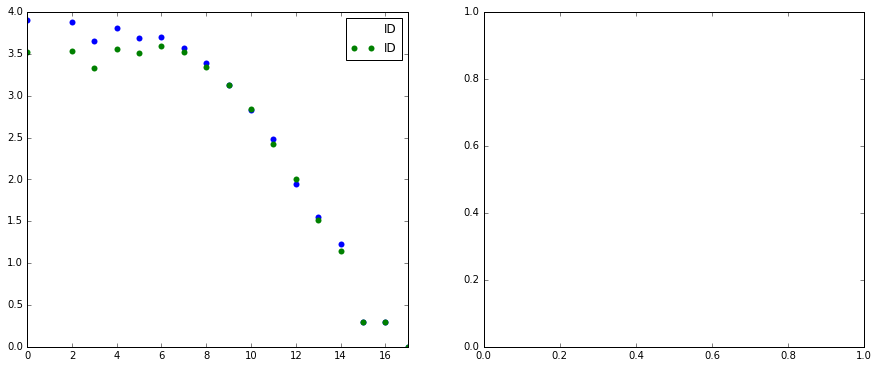

In [147]:
fig, axs = plt.subplots(1, 2, figsize =(15, 6))

ax = axs[0]
for t in [7, 8]:
    log10(degree_dist.loc[t]).reset_index().plot(marker = 'o', linewidth = 0, ax = ax, mec = 'None')

## Degree distribution and assortativity

In [ ]:
# window = 3
# assortativity_res = []
ID_degree_res = []
VAT_degree_res = []

for window in [3]:
    gap = (window-1)/2
    center_years = arange(2003, 2014, 2)
    print window

    for Yc in center_years:
        print Yc
        data_sec = data.loc[data.YEAR - Yc <= gap]
#         data_sec.groupby(['ID', 'VAT']).agg({'CN ID 8': tunique, 'VART_sum': sum })

        data_sec_by_ID = data_sec.groupby(['ID']).agg({'VAT': tunique, 'VART_sum': sum})

        ID_degree = data_sec_by_ID[['VAT']].reset_index()
        ID_degree.columns = [u'ID', u'ID_degree']
        ID_degree['center_year'] = Yc
        ID_degree['window'] = window
        
        with ProgressBar():
            ID_deg = ID_degree.compute()
            ID_deg['bin'] = pd.cut(log10(ID_deg['ID_degree']), bins = arange(-.49, 5.99, .25))
            ID_deg.to_csv('ID_deg_'+str(Yc)+'_'+str(window))
#         ID_degree_res += [ID_degree]     

#         ID_deg = pd.read_csv()
        sampling = ID_deg.groupby(['bin'], observed = True).apply(lambda x: x.sample(200, replace = True))

        data_sec_sample = data_sec.loc[data_sec.ID.isin(sampling['ID'].values)]
        data_sec_by_VAT = data_sec_sample.groupby(['VAT']).agg({'ID': tunique, 'VART_sum': sum})

        VAT_degree = data_sec_by_VAT[['ID']].reset_index()
        VAT_degree.columns = [u'VAT', u'VAT_degree']
        VAT_degree['center_year'] = Yc
        VAT_degree['window'] = window
        VAT_degree_res += [VAT_degree]
        with ProgressBar():
            VAT_deg = VAT_degree.compute()
            VAT_deg.to_csv('VAT_deg_'+str(Yc)+'_'+str(window))

In [ ]:
# VAT_degree_res = []
# for window in [1, 3, 5]:
#     gap = (window-1)/2
#     center_years = arange(1997, 2014, 2)
#     print window

#     for Yc in center_years:
    
#         ID_deg = pd.read_csv('./ID_deg_save.csv')
#         ID_deg = ID_deg.loc[(ID_deg.center_year == Yc) & (ID_deg.window == window)]
#         ID_deg['bin'] = pd.cut(log10(ID_deg['ID_degree']), bins = arange(-.49, 5.99, .25))
#         sampling = ID_deg.groupby(['bin'], observed = True).apply(lambda x: x.sample(50, replace = True))

#         data_sec_sample = data_sec.loc[data_sec.ID.isin(sampling['ID'].values)]
#         data_sec_by_VAT = data_sec_sample.groupby(['VAT']).agg({'ID': tunique, 'VART_sum': sum})

#         VAT_degree = data_sec_by_VAT[['ID']].reset_index()
#         VAT_degree.columns = [u'VAT', u'VAT_degree']
#         VAT_degree['center_year'] = Yc
#         VAT_degree['window'] = window
#         VAT_degree_res += [VAT_degree]
#         with ProgressBar():
#             VAT_deg = VAT_degree.compute()
#             VAT_deg.to_csv('VAT_deg_save_'+str(Yc)+'_'+str(window))

# #         assortativity_info = data_sec_sample.groupby(['ID', 'VAT'])[['VART_sum']].mean().reset_index().merge(
# #             ID_degree).merge(VAT_degree)
# #         assortativity_res += [assortativity_info]


In [ ]:
# ID_degree['bin'] = 
# pd.cut(log10(ID_degree['ID_degree']), bins = arange(-.49, 5.99, .5))

In [ ]:
# # ID_deg_res = dd.concat(ID_degree_res)
# # with ProgressBar():
# #     ID_deg = ID_deg_res.compute()

# VAT_deg_res = dd.concat(VAT_degree_res)
# with ProgressBar():
#     VAT_deg = VAT_deg_res.compute()

In [ ]:
# ID_deg.to_csv('./ID_deg_save.csv', index = False)
# VAT_deg.to_csv('./VAT_deg_save.csv', index = False)

In [ ]:
# plt.hist(log10(ID_deg['ID_degree']), bins = arange(-.49, 5.99, .25))
# plt.show()

In [ ]:
# # 
# # data_sec_sample.merge(ID_deg).merge(VAT_deg).compute()
# assortativity_info = data_sec_sample.groupby(['ID', 'VAT'])[['VART_sum']].mean().reset_index().merge(
#         ID_degree).merge(VAT_degree)

In [ ]:

# with ProgressBar():
#     assortativity_df = assortativity_info.compute()

In [ ]:
# assortativity_info.groupby(pd.cut(log10(assortativity_info['ID_degree']), bins = arange(-.49, 5.99, .5)))#['VAT_degree'].describe()

In [ ]:
# ID_deg['bin'] = pd.cut(log10(ID_deg['ID_degree']), bins = arange(-.49, 5.99, .5))
# ID_deg.groupby(['center_year','bin'])

In [ ]:
# data_sec_sample

In [ ]:
# # ID_deg.to_csv('degree_values.csv', index = False)

# from numpy import power
# left = power(10, arange(-.1, 5, .2)).round(1)
# right = power(10, arange(-.1, 5, .2) + .2).round(1)
# bins = pd.IntervalIndex.from_arrays(left, right)

# ID_deg_part = ID_deg.loc[(ID_deg.center_year == Yc) & (ID_deg.window == window)]
# ID_deg_part.groupby(pd.cut(ID_deg_part['ID_degree'], bins), observed = True).count().sort_index()

# sample_IDs = ID_deg_part.groupby(pd.cut(ID_deg_part['ID_degree'], bins), observed = True).apply(lambda x: x.sample(1000, replace = True))['ID'].values

# data_sec = data.loc[(data.YEAR - Yc <= gap) & (data.ID.isin(sample_IDs))]

    
# #.apply(lambda x: x.sample(5000, replace = True))['ID'].values

In [ ]:
# window = 3
# results = []
    
# gap = (3-1)/2
# center_years = arange(1997, 2014, 2)
# ID_degree_res = []
# VAT_degree_res = []



# for Yc in center_years:
#     VAT_deg_part = VAT_deg.loc[(VAT_deg.center_year == Yc) & (VAT_deg.window == window)]
#     ID_deg_part = ID_deg.loc[(ID_deg.center_year == Yc) & (ID_deg.window == window)]
#     sample_IDs = ID_deg_part.groupby(pd.cut(ID_deg_part['ID_degree'], bins), observed = True).apply(lambda x: x.sample(1000, replace = True))['ID'].values
    
#     data_sec = data.loc[(data.YEAR - Yc <= gap) & (data.ID.isin(sample_IDs))]

#     df_degrees = data_sec.merge(ID_deg_part, on = 'ID').merge(VAT_deg_part, on = ['VAT', 'center_year', 'window'])

#     results += [df_degrees]


In [ ]:
# summary_results = []

# for df_degrees in results:

#     with ProgressBar():
#         x = df_degrees.compute()

#     summary_result = x.groupby(pd.cut(x['ID_degree'], bins)).agg({'VART_sum': 'sum', 'ID_degree': 'mean',
#                                             'VAT_degree': 'describe', 'center_year' : 'median', 'window': 'median'})
#     summary_results += [summary_result]

In [ ]:
# pd.concat(summary_results).dropna().to_csv('./assortativity_2000_full.csv')

In [ ]:
# pd.concat(summary_results)

In [ ]:
# pd.concat(summary_results).dropna().to_csv('./assortativity_2000_8plus.csv')

In [ ]:
# window = 3
# results = []
    
# gap = (3-1)/2
# center_years = arange(1997, 2014, 2)
# ID_degree_res = []
# VAT_degree_res = []

# for Yc in center_years:
#     data_sec = data.loc[data.YEAR - Yc <= gap]

# #     data_sec.groupby(['ID', 'VAT']).agg({'CN ID 8': tunique, 'VART_sum': sum })

#     data_sec_by_VAT = data_sec.groupby(['VAT']).agg({'ID': tunique, 'VART_sum': sum})
#     data_sec_by_ID = data_sec.groupby(['ID']).agg({'VAT': tunique, 'VART_sum': sum})

#     VAT_degree = data_sec_by_VAT[['ID']].reset_index()
#     VAT_degree.columns = [u'VAT', u'VAT_degree']
#     ID_degree = data_sec_by_ID[['VAT']].reset_index()
#     ID_degree.columns = [u'ID', u'ID_degree']

#     df_degrees = data_sec.merge(ID_degree, on = 'ID').merge(VAT_degree, on = 'VAT')

#     from numpy import power
#     left = power(10, arange(0, 4.5, .1)).round()
#     right = power(10, arange(0, 4.5, .1) + .1).round()
#     bins = pd.IntervalIndex.from_arrays(left, right)

#     df_degrees['ID_degree_bin'] = df_degrees['ID_degree'].map_partitions(pd.cut, bins)
#     df_degrees['VAT_degree_bin'] = df_degrees['VAT_degree'].map_partitions(pd.cut, bins)
    
#     result = df_degrees.groupby('ID_degree_bin')[['ID_degree','VAT_degree']].agg({'ID_degree': 'mean', 'VAT_degree': 'mean'})
#     result.columns = pd.MultiIndex.from_product([result.columns, [str(Yc)], [str(window)]])
#     results += [result]

In [ ]:
# res = dd.concat(results, axis = 1)


# with ProgressBar():
#     out_2 = res.compute()

In [ ]:
# fig, ax = plt.subplots(1)
# df_degrees.groupby('VAT_degree_bin')['ID_degree','VAT_degree'].quantile(.25).plot(x = 'VAT_degree', y = 'ID_degree', marker = '', ax = ax)
# df_degrees.groupby('VAT_degree_bin')['ID_degree','VAT_degree'].quantile(.5).plot(x = 'VAT_degree', y = 'ID_degree', marker = '', ax = ax)
# df_degrees.groupby('VAT_degree_bin')['ID_degree','VAT_degree'].quantile(.75).plot(x = 'VAT_degree', y = 'ID_degree', marker = '', ax = ax)

# # df_degrees.groupby('ID_nunique_bin')['VAT_nunique','ID_nunique'].mean().plot(x = 'ID_nunique', y = 'VAT_nunique', marker = 'o', ax = ax)
# df_degrees.groupby('ID_nunique')['VAT_nunique'].median().plot(x = 'index', y = 'VAT_nunique', marker = '.', linewidth = 0, ax = ax)
# ax.set_xscale('log')
# ax.set_yscale('log')

In [ ]:
# ### Choose a bin_size, 
# size_df_list = n_size_bins * [ None ]

# for s in range(14, n_size_bins):

#     bs_ix_df = exp_index.loc[exp_index.size_bins == s]

#     size_i_df_list = []
#     for dataset_i in bs_ix_df.exp_mma_cat.unique():
#         df = df_list[dataset_i]
#         size_i_df_list += [df.loc[df.ID.isin(bs_ix_df.ID)]]

#         size_df_list[s] = pd.concat(size_i_df_list)